## **Exploratory Data Analysis of World Bank Data Set**
> Data includes 27 separate columns for all countries from 1970 to present

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data set. Saved out on one of my public github repos
raw_data = pd.read_csv('https://raw.githubusercontent.com/jshumway0475/Predictive-Analytics/main/wb_raw_data_10-24-2021.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13495 entries, 0 to 13494
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   economy            13495 non-null  object 
 1   time               13495 non-null  object 
 2   EG.ELC.ACCS.ZS     6755 non-null   float64
 3   EG.ELC.COAL.ZS     7795 non-null   float64
 4   EG.ELC.FOSL.ZS     7795 non-null   float64
 5   EG.ELC.HYRO.ZS     7795 non-null   float64
 6   EG.ELC.LOSS.ZS     7668 non-null   float64
 7   EG.ELC.NGAS.ZS     7795 non-null   float64
 8   EG.ELC.NUCL.ZS     7667 non-null   float64
 9   EG.ELC.PETR.ZS     7795 non-null   float64
 10  EG.ELC.RNWX.ZS     7795 non-null   float64
 11  EN.ATM.GHGT.KT.CE  11726 non-null  float64
 12  EN.ATM.METH.KT.CE  11948 non-null  float64
 13  IC.LGL.CRED.XQ     1659 non-null   float64
 14  NE.EXP.GNFS.ZS     9925 non-null   float64
 15  NE.IMP.GNFS.ZS     9926 non-null   float64
 16  NV.AGR.TOTL.ZS     933

In [3]:
raw_data.columns

Index(['economy', 'time', 'EG.ELC.ACCS.ZS', 'EG.ELC.COAL.ZS', 'EG.ELC.FOSL.ZS',
       'EG.ELC.HYRO.ZS', 'EG.ELC.LOSS.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS',
       'EG.ELC.PETR.ZS', 'EG.ELC.RNWX.ZS', 'EN.ATM.GHGT.KT.CE',
       'EN.ATM.METH.KT.CE', 'IC.LGL.CRED.XQ', 'NE.EXP.GNFS.ZS',
       'NE.IMP.GNFS.ZS', 'NV.AGR.TOTL.ZS', 'NV.IND.MANF.ZS', 'NV.IND.TOTL.ZS',
       'NV.SRV.TOTL.ZS', 'NY.GDP.MKTP.CD', 'SI.POV.GINI', 'SI.POV.MDIM',
       'SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN', 'SP.DYN.LE00.FE.IN',
       'SP.DYN.TFRT.IN', 'SP.POP.TOTL', 'SP.URB.TOTL'],
      dtype='object')

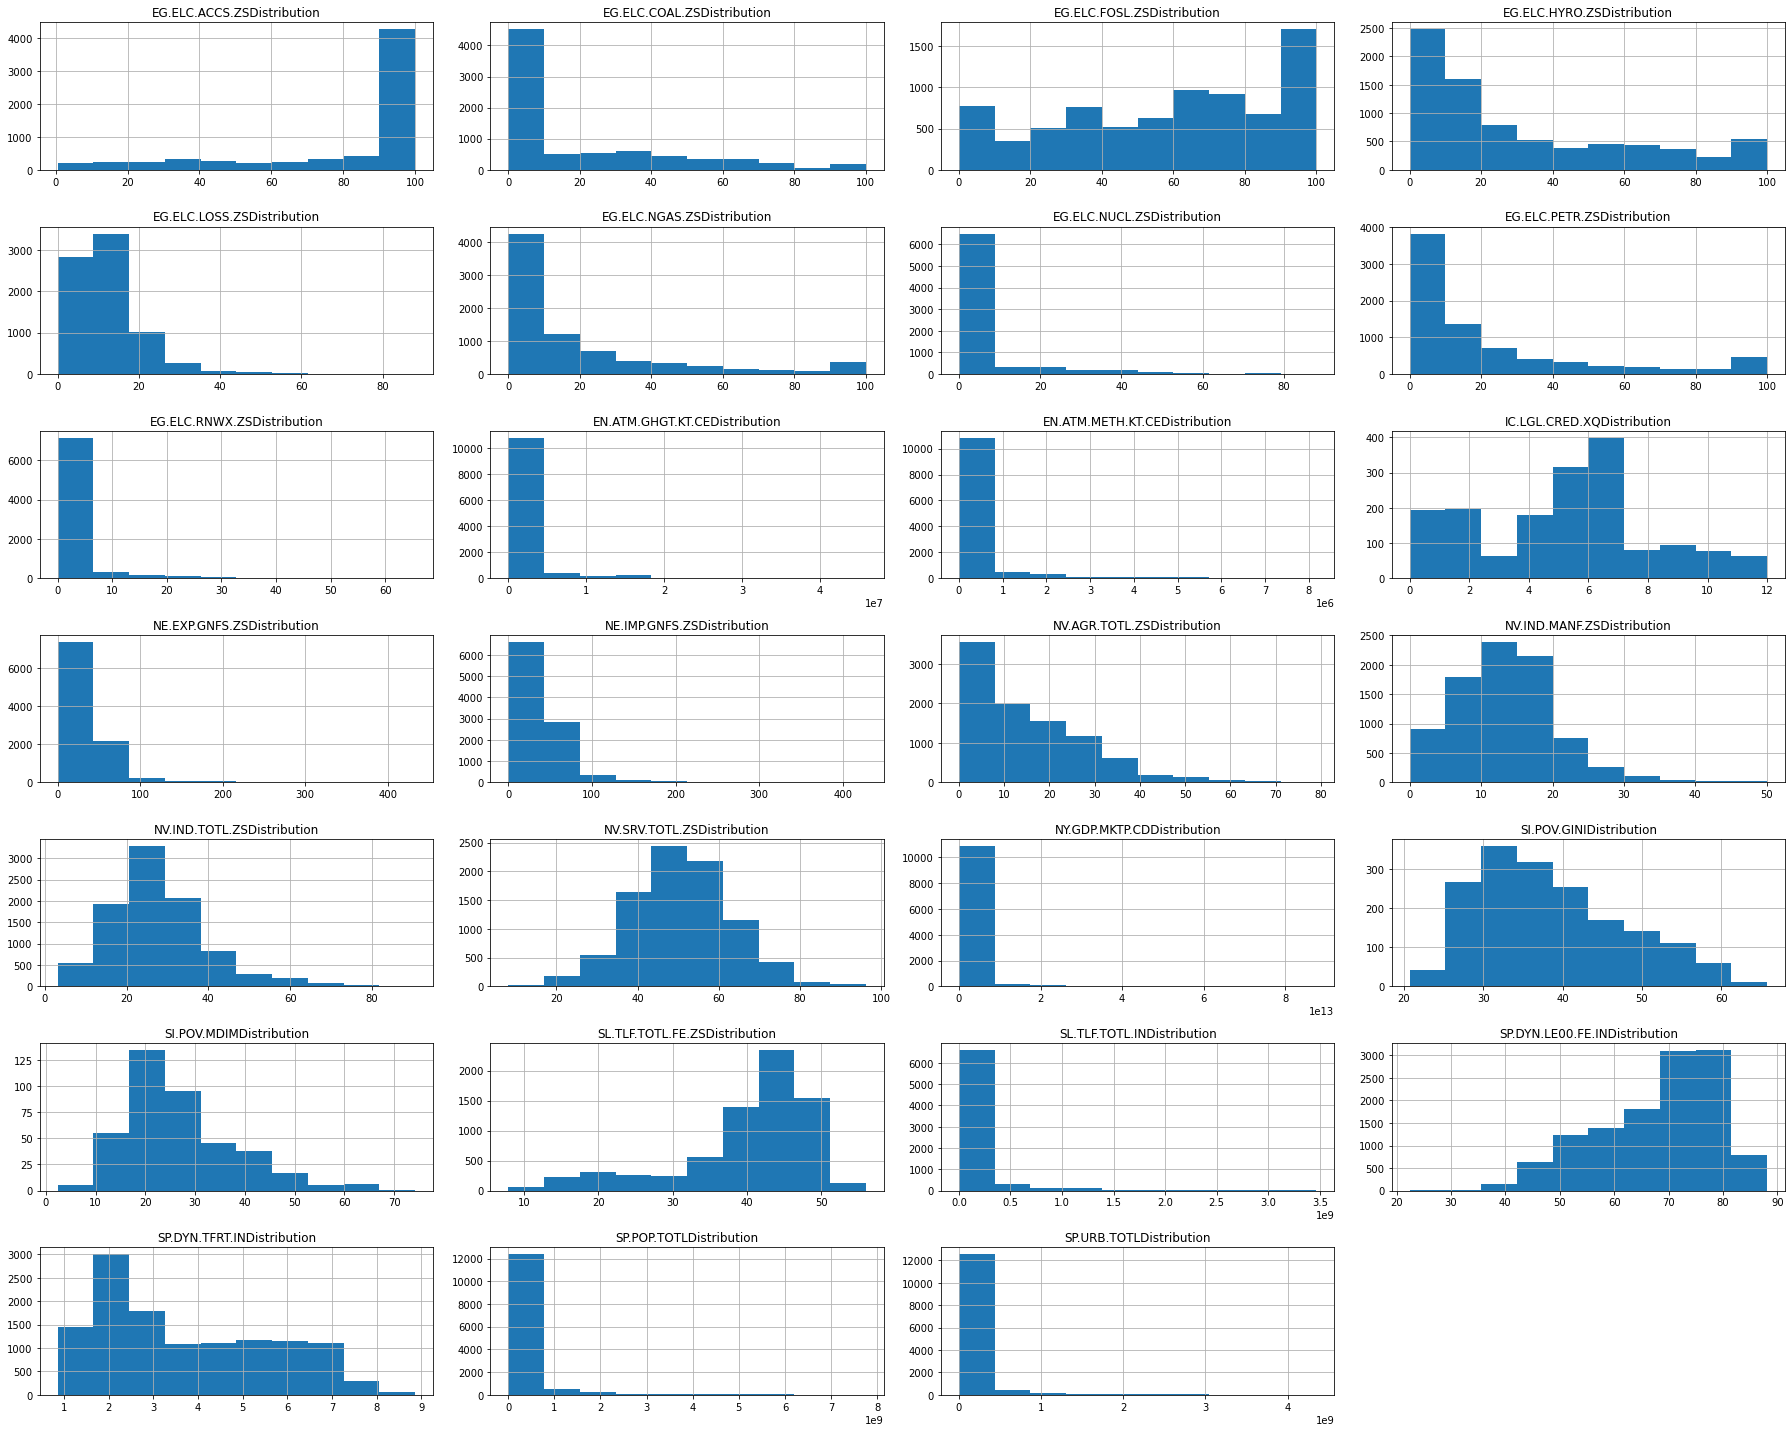

In [4]:
# Draw histograms for all columns
fig = plt.figure(figsize = (25, 20))
for i, var_name in enumerate(raw_data.columns[2:]):
    ax = fig.add_subplot(7, 4, i + 1)
    raw_data[var_name].hist(ax = ax)
    ax.set_title(var_name + 'Distribution')
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'World Bank Dataset Correlation Matrix')

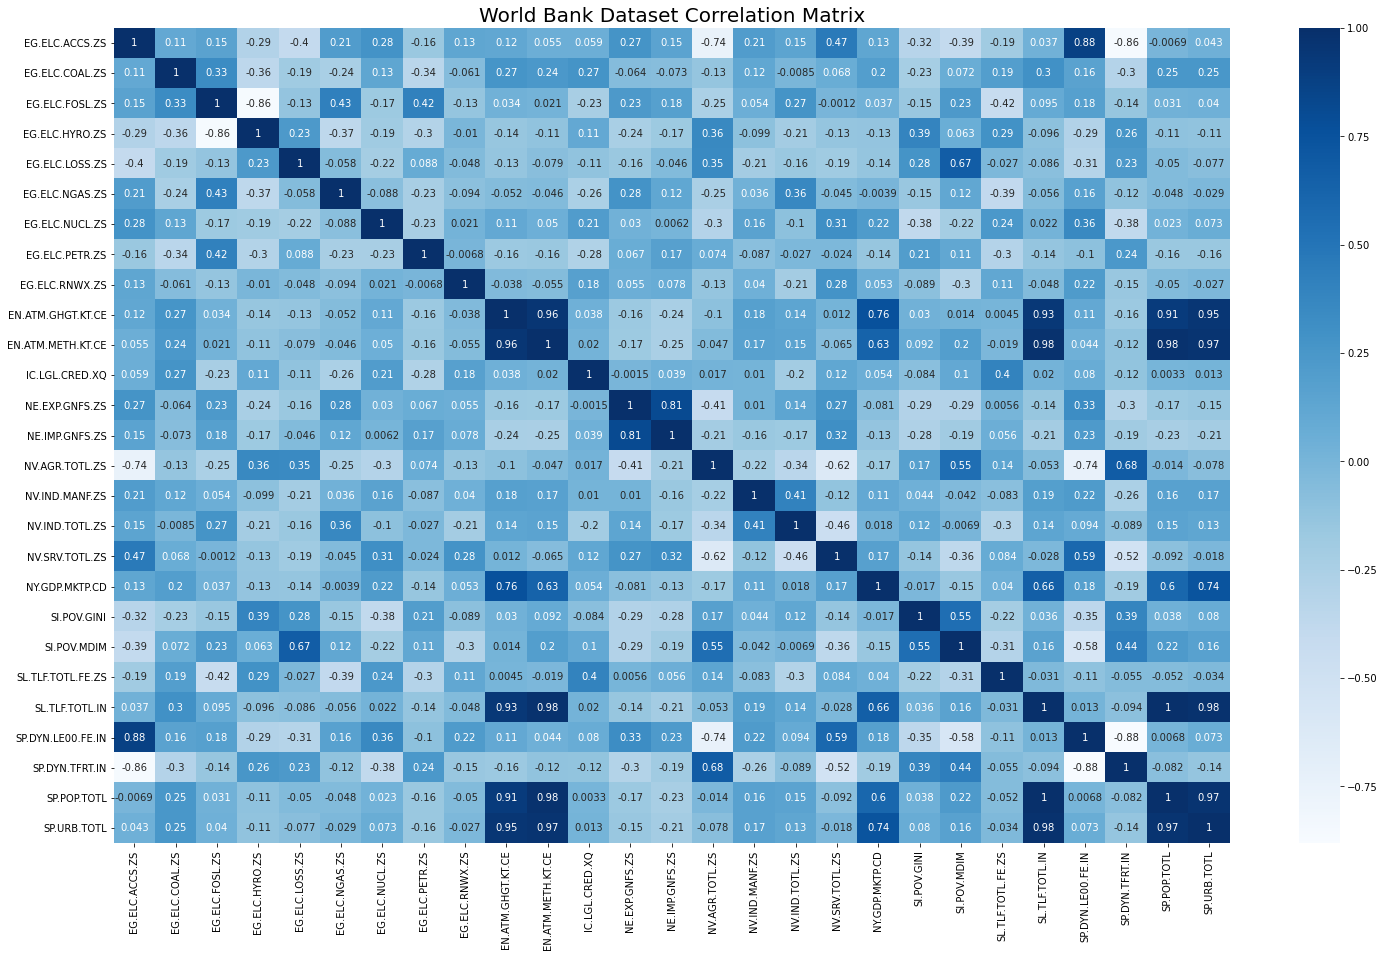

In [5]:
# Show full correlation matrix
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.heatmap(raw_data.iloc[:,2:].corr(), ax = ax, annot = True, cmap = 'Blues').set_title('World Bank Dataset Correlation Matrix', fontsize = 20)

In [6]:
# list pairs with strong correlations
c = raw_data.iloc[:,2:].corr()
corr_limit = 0.3
c = c[c != 1]
c = c[(c < -corr_limit) | (c > corr_limit)]
s = c.unstack()
s = s.dropna()
print(s.to_string())

EG.ELC.ACCS.ZS     EG.ELC.LOSS.ZS      -0.402456
                   NV.AGR.TOTL.ZS      -0.743705
                   NV.SRV.TOTL.ZS       0.467965
                   SI.POV.GINI         -0.321007
                   SI.POV.MDIM         -0.389237
                   SP.DYN.LE00.FE.IN    0.880947
                   SP.DYN.TFRT.IN      -0.859923
EG.ELC.COAL.ZS     EG.ELC.FOSL.ZS       0.332708
                   EG.ELC.HYRO.ZS      -0.358497
                   EG.ELC.PETR.ZS      -0.338255
                   SL.TLF.TOTL.IN       0.300688
                   SP.DYN.TFRT.IN      -0.302434
EG.ELC.FOSL.ZS     EG.ELC.COAL.ZS       0.332708
                   EG.ELC.HYRO.ZS      -0.863679
                   EG.ELC.NGAS.ZS       0.425082
                   EG.ELC.PETR.ZS       0.417952
                   SL.TLF.TOTL.FE.ZS   -0.421593
EG.ELC.HYRO.ZS     EG.ELC.COAL.ZS      -0.358497
                   EG.ELC.FOSL.ZS      -0.863679
                   EG.ELC.NGAS.ZS      -0.365761
                   N

In [7]:
# Calculate the percentage of data completeness in each column
round(((raw_data.shape[0] - raw_data.isna().sum()) / raw_data.shape[0]) *100, 2)

economy              100.00
time                 100.00
EG.ELC.ACCS.ZS        50.06
EG.ELC.COAL.ZS        57.76
EG.ELC.FOSL.ZS        57.76
EG.ELC.HYRO.ZS        57.76
EG.ELC.LOSS.ZS        56.82
EG.ELC.NGAS.ZS        57.76
EG.ELC.NUCL.ZS        56.81
EG.ELC.PETR.ZS        57.76
EG.ELC.RNWX.ZS        57.76
EN.ATM.GHGT.KT.CE     86.89
EN.ATM.METH.KT.CE     88.54
IC.LGL.CRED.XQ        12.29
NE.EXP.GNFS.ZS        73.55
NE.IMP.GNFS.ZS        73.55
NV.AGR.TOTL.ZS        69.20
NV.IND.MANF.ZS        62.40
NV.IND.TOTL.ZS        68.65
NV.SRV.TOTL.ZS        64.71
NY.GDP.MKTP.CD        83.60
SI.POV.GINI           12.92
SI.POV.MDIM            2.97
SL.TLF.TOTL.FE.ZS     52.22
SL.TLF.TOTL.IN        53.96
SP.DYN.LE00.FE.IN     90.65
SP.DYN.TFRT.IN        90.76
SP.POP.TOTL           99.91
SP.URB.TOTL           99.16
dtype: float64

In [8]:
# Clean up data set for missingness and sparsely populated columns

# Drop the SI.POV.GINI, IC.LGL.CRED.XQ and SI.POV.MDIM columns due to incompleteness
clean_data = raw_data.drop(['SI.POV.GINI', 'SI.POV.MDIM', 'IC.LGL.CRED.XQ'], axis = 1)

# Delete rows with missing values for SP.POP.TOTL or NY.GDP.MKTP.CD
clean_data = clean_data[clean_data['SP.POP.TOTL'].notna()]
clean_data = clean_data[clean_data['NY.GDP.MKTP.CD'].notna()]
clean_data.shape

(11279, 26)

In [9]:
# Check again for completeness
round(((clean_data.shape[0] - clean_data.isna().sum()) / clean_data.shape[0]) *100, 2)

economy              100.00
time                 100.00
EG.ELC.ACCS.ZS        56.02
EG.ELC.COAL.ZS        64.00
EG.ELC.FOSL.ZS        64.00
EG.ELC.HYRO.ZS        64.00
EG.ELC.LOSS.ZS        62.59
EG.ELC.NGAS.ZS        64.00
EG.ELC.NUCL.ZS        62.90
EG.ELC.PETR.ZS        64.00
EG.ELC.RNWX.ZS        64.00
EN.ATM.GHGT.KT.CE     89.98
EN.ATM.METH.KT.CE     91.21
NE.EXP.GNFS.ZS        87.32
NE.IMP.GNFS.ZS        87.33
NV.AGR.TOTL.ZS        82.00
NV.IND.MANF.ZS        74.10
NV.IND.TOTL.ZS        81.35
NV.SRV.TOTL.ZS        76.82
NY.GDP.MKTP.CD       100.00
SL.TLF.TOTL.FE.ZS     59.64
SL.TLF.TOTL.IN        61.54
SP.DYN.LE00.FE.IN     93.87
SP.DYN.TFRT.IN        93.82
SP.POP.TOTL          100.00
SP.URB.TOTL           99.81
dtype: float64

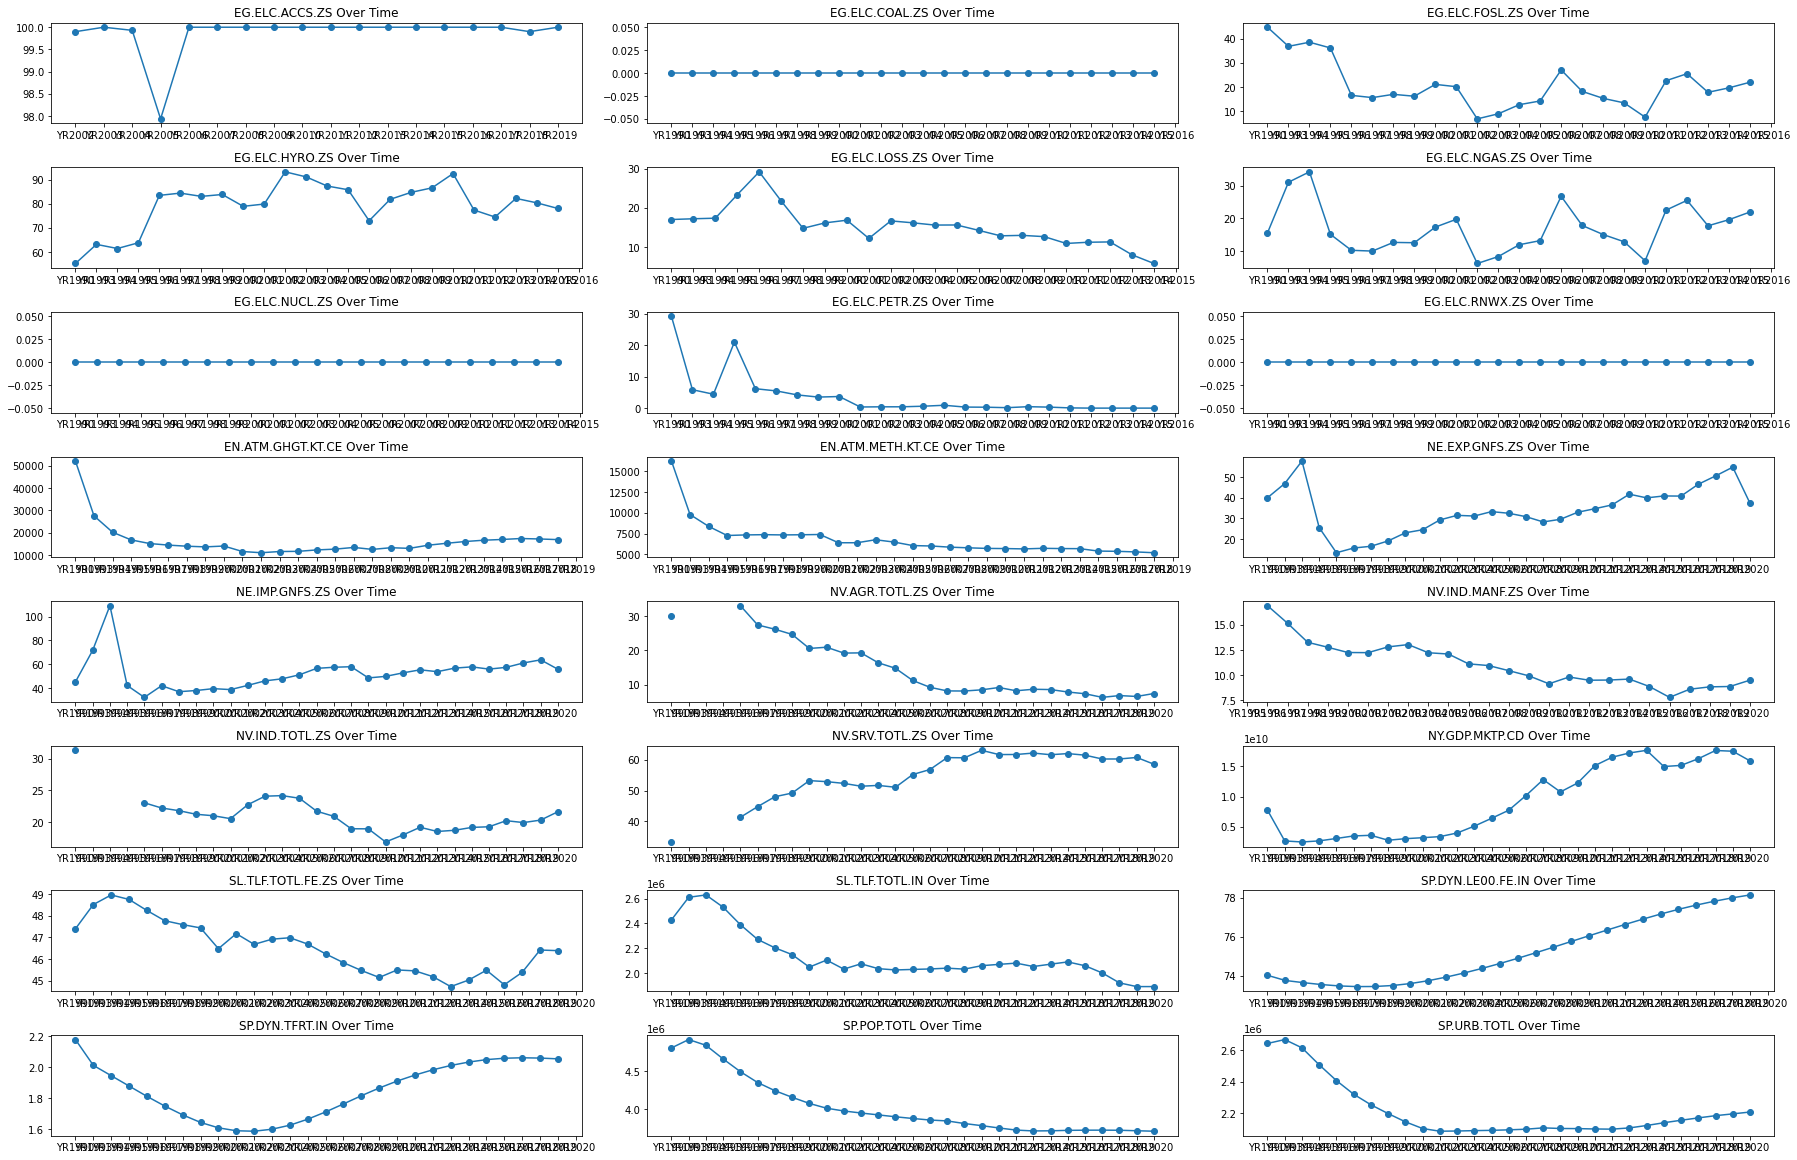

In [10]:
# Review time series data for specific countries / economies
plot_data = clean_data[clean_data['economy'] == 'GEO']
fig = plt.figure(figsize = (25, 20))
for i, var_name in enumerate(plot_data.columns[2:]):
    ax = fig.add_subplot(10, 3, i + 1)
    ax.plot(plot_data['time'], plot_data[var_name], '-o')
    ax.set_title(var_name + ' Over Time')
fig.tight_layout()
plt.show()

In [11]:
# Filter data set to exclude countries (economies) that are missing significant portions of the data set
econ_include = ['ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BGD', 'BRB', 'BLR', 'BEL', 'BEN', 'BOL', 
                'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'KHM', 'CMR', 'CAN', 'CHL', 'CHN', 'COL', 'COG', 'CRI', 'CIV', 
                'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'ERI', 'EST', 'ETH', 'FIN', 'FRA', 
                'GAB', 'GEO', 'DEU', 'GHA', 'GRC', 'GTM', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 
                'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KOR', 'KWT', 'KGZ', 'LVA', 'LBN', 
                'LBY', 'LTU', 'LUX', 'MKD', 'MYS', 'MLT', 'MUS', 'MEX', 'MNG', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 
                'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'NOR', 'OMN', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 
                'QAT', 'RUS', 'SAU', 'SEN', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'SDN', 'SUR', 'SWE', 'CHE', 
                'SYR', 'TJK', 'TZA', 'THA', 'TGO', 'TTO', 'TUN', 'TUR', 'TKM', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 
                'UZB', 'VEN', 'VNM', 'WLD', 'YEM', 'ZMB', 'ZWE']
clean_data2 = clean_data[clean_data.economy.isin(econ_include)]

# Exclude 2019 and 2020 data from data set
clean_data2 = clean_data2[clean_data2['time'] != 'YR2020']
clean_data2 = clean_data2[clean_data2['time'] != 'YR2019']
clean_data2.shape

(5713, 26)

In [12]:
# Review clean_data2 for completeness
round(((clean_data2.shape[0] - clean_data2.isna().sum()) / clean_data2.shape[0]) *100, 2)

economy              100.00
time                 100.00
EG.ELC.ACCS.ZS        58.13
EG.ELC.COAL.ZS        89.52
EG.ELC.FOSL.ZS        89.52
EG.ELC.HYRO.ZS        89.52
EG.ELC.LOSS.ZS        86.63
EG.ELC.NGAS.ZS        89.52
EG.ELC.NUCL.ZS        87.87
EG.ELC.PETR.ZS        89.52
EG.ELC.RNWX.ZS        89.52
EN.ATM.GHGT.KT.CE     98.53
EN.ATM.METH.KT.CE     99.49
NE.EXP.GNFS.ZS        94.50
NE.IMP.GNFS.ZS        94.50
NV.AGR.TOTL.ZS        86.78
NV.IND.MANF.ZS        81.45
NV.IND.TOTL.ZS        86.26
NV.SRV.TOTL.ZS        81.67
NY.GDP.MKTP.CD       100.00
SL.TLF.TOTL.FE.ZS     65.95
SL.TLF.TOTL.IN        65.95
SP.DYN.LE00.FE.IN    100.00
SP.DYN.TFRT.IN       100.00
SP.POP.TOTL          100.00
SP.URB.TOTL          100.00
dtype: float64

In [13]:
# Add year integer to clean_data2 dataframe
year_int = []
for y in range(0, clean_data2.shape[0]):
    year_int.append(int(clean_data2['time'].iloc[y][2:6]))
clean_data2['year'] = year_int
clean_data2.columns

Index(['economy', 'time', 'EG.ELC.ACCS.ZS', 'EG.ELC.COAL.ZS', 'EG.ELC.FOSL.ZS',
       'EG.ELC.HYRO.ZS', 'EG.ELC.LOSS.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS',
       'EG.ELC.PETR.ZS', 'EG.ELC.RNWX.ZS', 'EN.ATM.GHGT.KT.CE',
       'EN.ATM.METH.KT.CE', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS',
       'NV.AGR.TOTL.ZS', 'NV.IND.MANF.ZS', 'NV.IND.TOTL.ZS', 'NV.SRV.TOTL.ZS',
       'NY.GDP.MKTP.CD', 'SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN',
       'SP.DYN.LE00.FE.IN', 'SP.DYN.TFRT.IN', 'SP.POP.TOTL', 'SP.URB.TOTL',
       'year'],
      dtype='object')

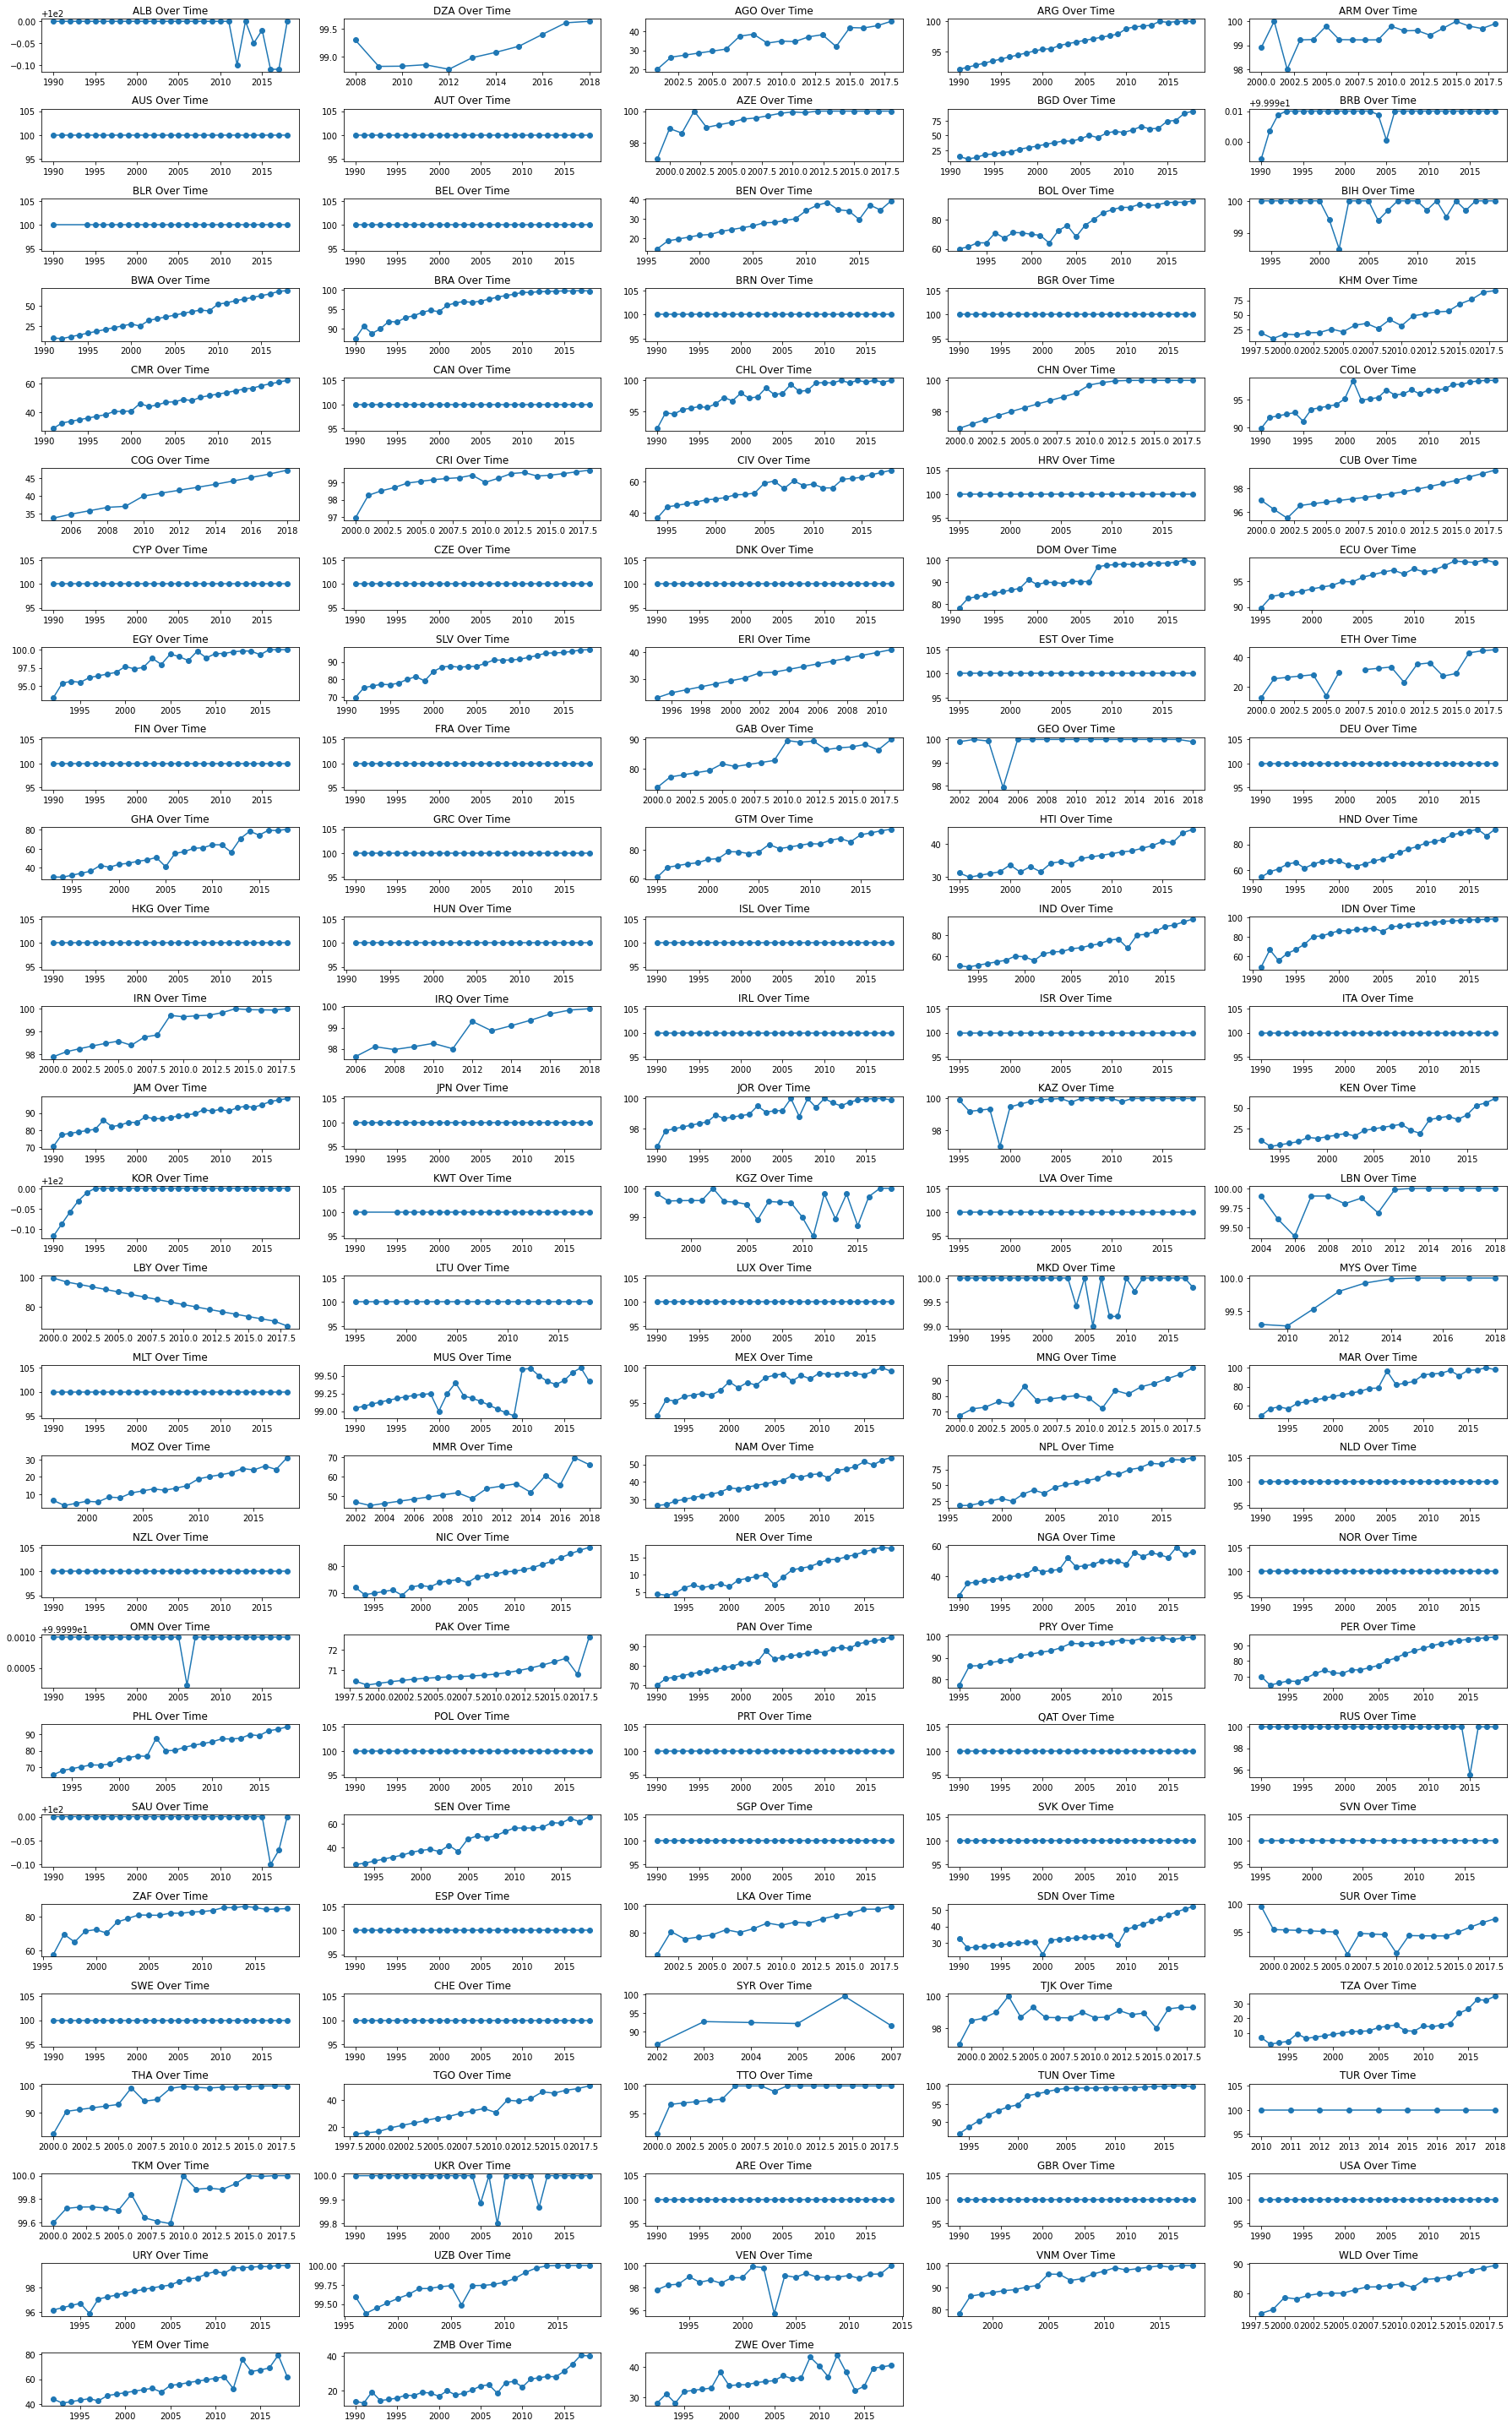

In [14]:
# Review plots of data for all countries for specific columns
var_name = 'EG.ELC.ACCS.ZS'
fig = plt.figure(figsize = (25, 40))
for i, country in enumerate(econ_include):
    ax = fig.add_subplot(27, 5, i + 1)
    plt_data = clean_data2[clean_data2['economy'] == country]
    ax.plot(plt_data['year'], plt_data[var_name], '-o')
    ax.set_title(country + ' Over Time')
fig.tight_layout()
plt.show()

In [15]:
clean_data2[np.isnan(clean_data2['EG.ELC.ACCS.ZS']) == True].shape

(2392, 27)

In [16]:
# In cases where previous value of EG.ELC.ACCS.ZS = 100 and row of investigation is Nan impute 100
for country in range(len(econ_include)):
    mask = clean_data2['economy'].str.contains(econ_include[country])
    for r in range(mask[mask == True].shape[0]):
        if (clean_data2.loc[mask, 'EG.ELC.ACCS.ZS'].values[r - 1] == 100) and (np.isnan((clean_data2.loc[mask, 'EG.ELC.ACCS.ZS'].values[r])) == True):
            r_index = clean_data2.loc[mask, 'EG.ELC.ACCS.ZS'].index[r]
            clean_data2.at[r_index, 'EG.ELC.ACCS.ZS'] = 100

In [17]:
clean_data2[np.isnan(clean_data2['EG.ELC.ACCS.ZS']) == True].shape

(1380, 27)

In [18]:
# Review clean_data2 for completeness
round(((clean_data2.shape[0] - clean_data2.isna().sum()) / clean_data2.shape[0]) *100, 2)

economy              100.00
time                 100.00
EG.ELC.ACCS.ZS        75.84
EG.ELC.COAL.ZS        89.52
EG.ELC.FOSL.ZS        89.52
EG.ELC.HYRO.ZS        89.52
EG.ELC.LOSS.ZS        86.63
EG.ELC.NGAS.ZS        89.52
EG.ELC.NUCL.ZS        87.87
EG.ELC.PETR.ZS        89.52
EG.ELC.RNWX.ZS        89.52
EN.ATM.GHGT.KT.CE     98.53
EN.ATM.METH.KT.CE     99.49
NE.EXP.GNFS.ZS        94.50
NE.IMP.GNFS.ZS        94.50
NV.AGR.TOTL.ZS        86.78
NV.IND.MANF.ZS        81.45
NV.IND.TOTL.ZS        86.26
NV.SRV.TOTL.ZS        81.67
NY.GDP.MKTP.CD       100.00
SL.TLF.TOTL.FE.ZS     65.95
SL.TLF.TOTL.IN        65.95
SP.DYN.LE00.FE.IN    100.00
SP.DYN.TFRT.IN       100.00
SP.POP.TOTL          100.00
SP.URB.TOTL          100.00
year                 100.00
dtype: float64

## Data completeness comments
> Labor force data does not appear to be populated in the World Bank dataset until the early to mid 1990s.  These columns are not likely to be key to analysis, so I will exclude these columns from the analysis in order to maintain a larger data sample

In [19]:
clean_data3 = clean_data2.drop(columns = ['SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN'], axis = 1)
clean_data3.shape

(5713, 25)

In [20]:
# Review clean_data3 for completeness
round(((clean_data3.shape[0] - clean_data3.isna().sum()) / clean_data3.shape[0]) *100, 2)

economy              100.00
time                 100.00
EG.ELC.ACCS.ZS        75.84
EG.ELC.COAL.ZS        89.52
EG.ELC.FOSL.ZS        89.52
EG.ELC.HYRO.ZS        89.52
EG.ELC.LOSS.ZS        86.63
EG.ELC.NGAS.ZS        89.52
EG.ELC.NUCL.ZS        87.87
EG.ELC.PETR.ZS        89.52
EG.ELC.RNWX.ZS        89.52
EN.ATM.GHGT.KT.CE     98.53
EN.ATM.METH.KT.CE     99.49
NE.EXP.GNFS.ZS        94.50
NE.IMP.GNFS.ZS        94.50
NV.AGR.TOTL.ZS        86.78
NV.IND.MANF.ZS        81.45
NV.IND.TOTL.ZS        86.26
NV.SRV.TOTL.ZS        81.67
NY.GDP.MKTP.CD       100.00
SP.DYN.LE00.FE.IN    100.00
SP.DYN.TFRT.IN       100.00
SP.POP.TOTL          100.00
SP.URB.TOTL          100.00
year                 100.00
dtype: float64

In [21]:
# Remove Nan values from analysis dataframe
clean_data3 = clean_data3.dropna()

In [22]:
# Review clean_data3 for completeness
round(((clean_data3.shape[0] - clean_data3.isna().sum()) / clean_data3.shape[0]) *100, 2)

economy              100.0
time                 100.0
EG.ELC.ACCS.ZS       100.0
EG.ELC.COAL.ZS       100.0
EG.ELC.FOSL.ZS       100.0
EG.ELC.HYRO.ZS       100.0
EG.ELC.LOSS.ZS       100.0
EG.ELC.NGAS.ZS       100.0
EG.ELC.NUCL.ZS       100.0
EG.ELC.PETR.ZS       100.0
EG.ELC.RNWX.ZS       100.0
EN.ATM.GHGT.KT.CE    100.0
EN.ATM.METH.KT.CE    100.0
NE.EXP.GNFS.ZS       100.0
NE.IMP.GNFS.ZS       100.0
NV.AGR.TOTL.ZS       100.0
NV.IND.MANF.ZS       100.0
NV.IND.TOTL.ZS       100.0
NV.SRV.TOTL.ZS       100.0
NY.GDP.MKTP.CD       100.0
SP.DYN.LE00.FE.IN    100.0
SP.DYN.TFRT.IN       100.0
SP.POP.TOTL          100.0
SP.URB.TOTL          100.0
year                 100.0
dtype: float64

In [23]:
# View descriptive statistics on cleaned dataset
clean_data3.describe().T

,count,mean,std,min,25%,50%,75%,max
EG.ELC.ACCS.ZS,2768.0,8.665620e+01,2.421087e+01,2.330188e+00,8.520880e+01,1.000000e+02,1.000000e+02,1.000000e+02
EG.ELC.COAL.ZS,2768.0,1.719184e+01,2.548519e+01,0.000000e+00,0.000000e+00,2.501214e+00,2.695486e+01,1.000000e+02
EG.ELC.FOSL.ZS,2768.0,5.743268e+01,3.306992e+01,0.000000e+00,2.974756e+01,6.237123e+01,8.858203e+01,1.000000e+02
EG.ELC.HYRO.ZS,2768.0,3.130569e+01,3.224602e+01,0.000000e+00,2.796414e+00,1.721839e+01,5.644120e+01,1.000000e+02
EG.ELC.LOSS.ZS,2768.0,1.311666e+01,9.927718e+00,0.000000e+00,6.764226e+00,1.061151e+01,1.626829e+01,8.675497e+01
EG.ELC.NGAS.ZS,2768.0,2.111020e+01,2.765253e+01,0.000000e+00,0.000000e+00,9.800027e+00,3.165225e+01,1.000000e+02
EG.ELC.NUCL.ZS,2768.0,6.580030e+00,1.556146e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.744083e+01
EG.ELC.PETR.ZS,2768.0,1.913064e+01,2.667116e+01,0.000000e+00,1.058950e+00,5.358828e+00,2.786081e+01,1.000000e+02
EG.ELC.RNWX.ZS,2768.0,2.957020e+00,5.990125e+00,0.000000e+00,0.000000e+00,4.208926e-01,2.542679e+00,5.585384e+01
EN.ATM.GHGT.KT.CE,2768.0,4.949980e+05,3.092819e+06,8.322821e+02,2.344750e+04,6.937500e+04,2.161000e+05,4.443819e+07


In [24]:
# Create calculated columns, use NY.GDP.MKTP.CD, EN.ATM.GHGT.KT.CE, EN.ATM.METH.KT.CE, & SP.POP.TOTL to create per capita values
# Create calculated columns, use SP.URB.TOTL & SP.POP.TOTL to calculate % of total
clean_data3['gdp_per_capita'] = clean_data3['NY.GDP.MKTP.CD'] / clean_data3['SP.POP.TOTL']
clean_data3['ghge_per_capita'] = clean_data3['EN.ATM.GHGT.KT.CE'] / clean_data3['SP.POP.TOTL'] # GHG emissions per capita
clean_data3['c2e_per_capita'] = clean_data3['EN.ATM.METH.KT.CE'] / clean_data3['SP.POP.TOTL'] # methane emissions per capita
clean_data3['urb_pop_pct'] = (clean_data3['SP.URB.TOTL'] / clean_data3['SP.POP.TOTL']) * 100 # percent of population in urban areas


In [25]:
# Exclude world level data from analysis dataframe
analysis_data, world = clean_data3[clean_data3['economy'] != 'WLD'], clean_data3[clean_data3['economy'] == 'WLD']

(2768, 29)


Text(0.5, 1.0, 'Data Count Distribution by Country')

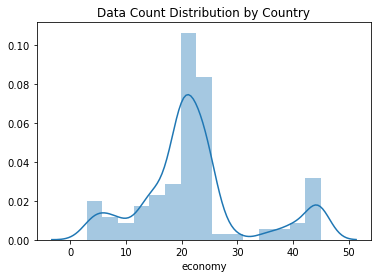

In [26]:
print(clean_data3.shape)
country_data = analysis_data['economy'].groupby(analysis_data['economy']).count()
sns.distplot(country_data).set_title('Data Count Distribution by Country')

In [27]:
#sns.pairplot(analysis_data)

<ipython-input-28-d3c8d4de3e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['log_gdp_pc'] = np.log(analysis_data['gdp_per_capita'])
<ipython-input-28-d3c8d4de3e03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['log_ghge_pc'] = np.log(analysis_data['ghge_per_capita'])


<AxesSubplot:xlabel='log_ghge_pc', ylabel='log_gdp_pc'>

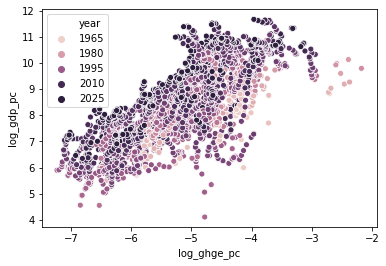

In [28]:
analysis_data['log_gdp_pc'] = np.log(analysis_data['gdp_per_capita'])
analysis_data['log_ghge_pc'] = np.log(analysis_data['ghge_per_capita'])
sns.scatterplot(data = analysis_data, x = 'log_ghge_pc', y = 'log_gdp_pc', hue = 'year')

Text(0.5, 1.0, 'Impact of Renewables on Greenhouse Gas Emissions')

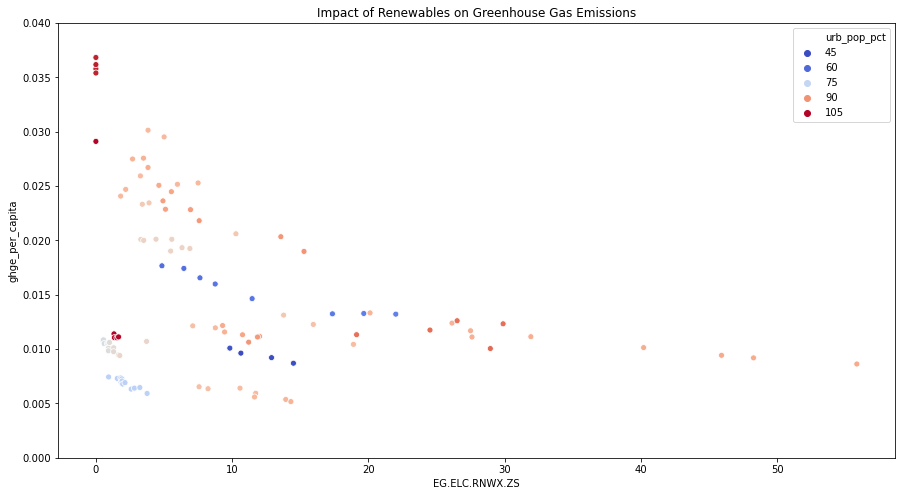

In [29]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = analysis_data[analysis_data['gdp_per_capita'] > 50000], x = 'EG.ELC.RNWX.ZS', y = 'ghge_per_capita', hue = 'urb_pop_pct', palette = 'coolwarm')
plt.ylim(0, 0.04)
plt.title('Impact of Renewables on Greenhouse Gas Emissions')

Text(0.5, 1.0, 'Impact of Nuclear on Greenhouse Gas Emissions')

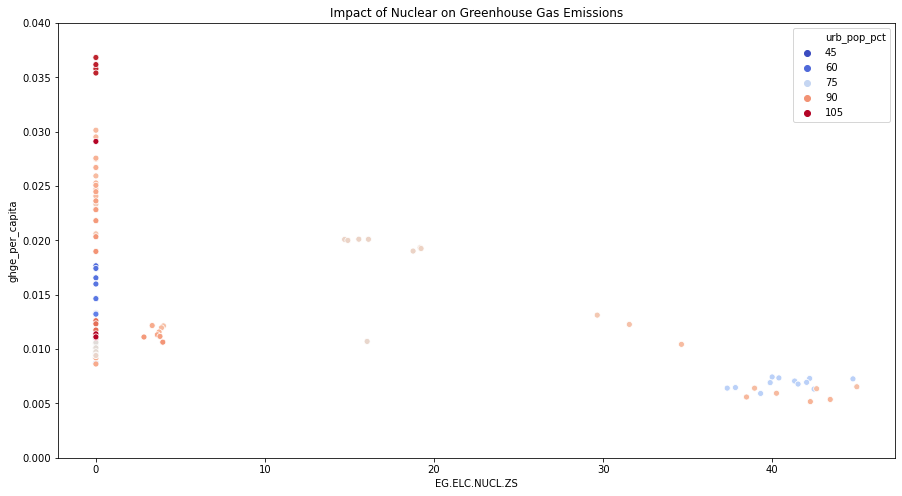

In [30]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = analysis_data[analysis_data['gdp_per_capita'] > 50000], x = 'EG.ELC.NUCL.ZS', y = 'ghge_per_capita', hue = 'urb_pop_pct', palette = 'coolwarm')
plt.ylim(0, 0.04)
plt.title('Impact of Nuclear on Greenhouse Gas Emissions')

In [31]:
analysis_data.columns

Index(['economy', 'time', 'EG.ELC.ACCS.ZS', 'EG.ELC.COAL.ZS', 'EG.ELC.FOSL.ZS',
       'EG.ELC.HYRO.ZS', 'EG.ELC.LOSS.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS',
       'EG.ELC.PETR.ZS', 'EG.ELC.RNWX.ZS', 'EN.ATM.GHGT.KT.CE',
       'EN.ATM.METH.KT.CE', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS',
       'NV.AGR.TOTL.ZS', 'NV.IND.MANF.ZS', 'NV.IND.TOTL.ZS', 'NV.SRV.TOTL.ZS',
       'NY.GDP.MKTP.CD', 'SP.DYN.LE00.FE.IN', 'SP.DYN.TFRT.IN', 'SP.POP.TOTL',
       'SP.URB.TOTL', 'year', 'gdp_per_capita', 'ghge_per_capita',
       'c2e_per_capita', 'urb_pop_pct', 'log_gdp_pc', 'log_ghge_pc'],
      dtype='object')

In [32]:
# Export data sets to use in modeling
analysis_data.to_csv('wb_clean_data_countries.csv')
world.to_csv('wb_clean_data_world.csv')

In [33]:
analysis_data_use = analysis_data[['economy', 'year', 'EG.ELC.ACCS.ZS', 'EG.ELC.COAL.ZS', 'EG.ELC.HYRO.ZS', 'EG.ELC.LOSS.ZS', 'EG.ELC.NGAS.ZS', 
                                    'EG.ELC.NUCL.ZS', 'EG.ELC.PETR.ZS', 'EG.ELC.RNWX.ZS', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 
                                    'NV.AGR.TOTL.ZS', 'NV.IND.TOTL.ZS', 'NV.SRV.TOTL.ZS', 'SP.DYN.LE00.FE.IN', 'SP.DYN.TFRT.IN', 
                                    'ghge_per_capita', 'urb_pop_pct', 'gdp_per_capita']]

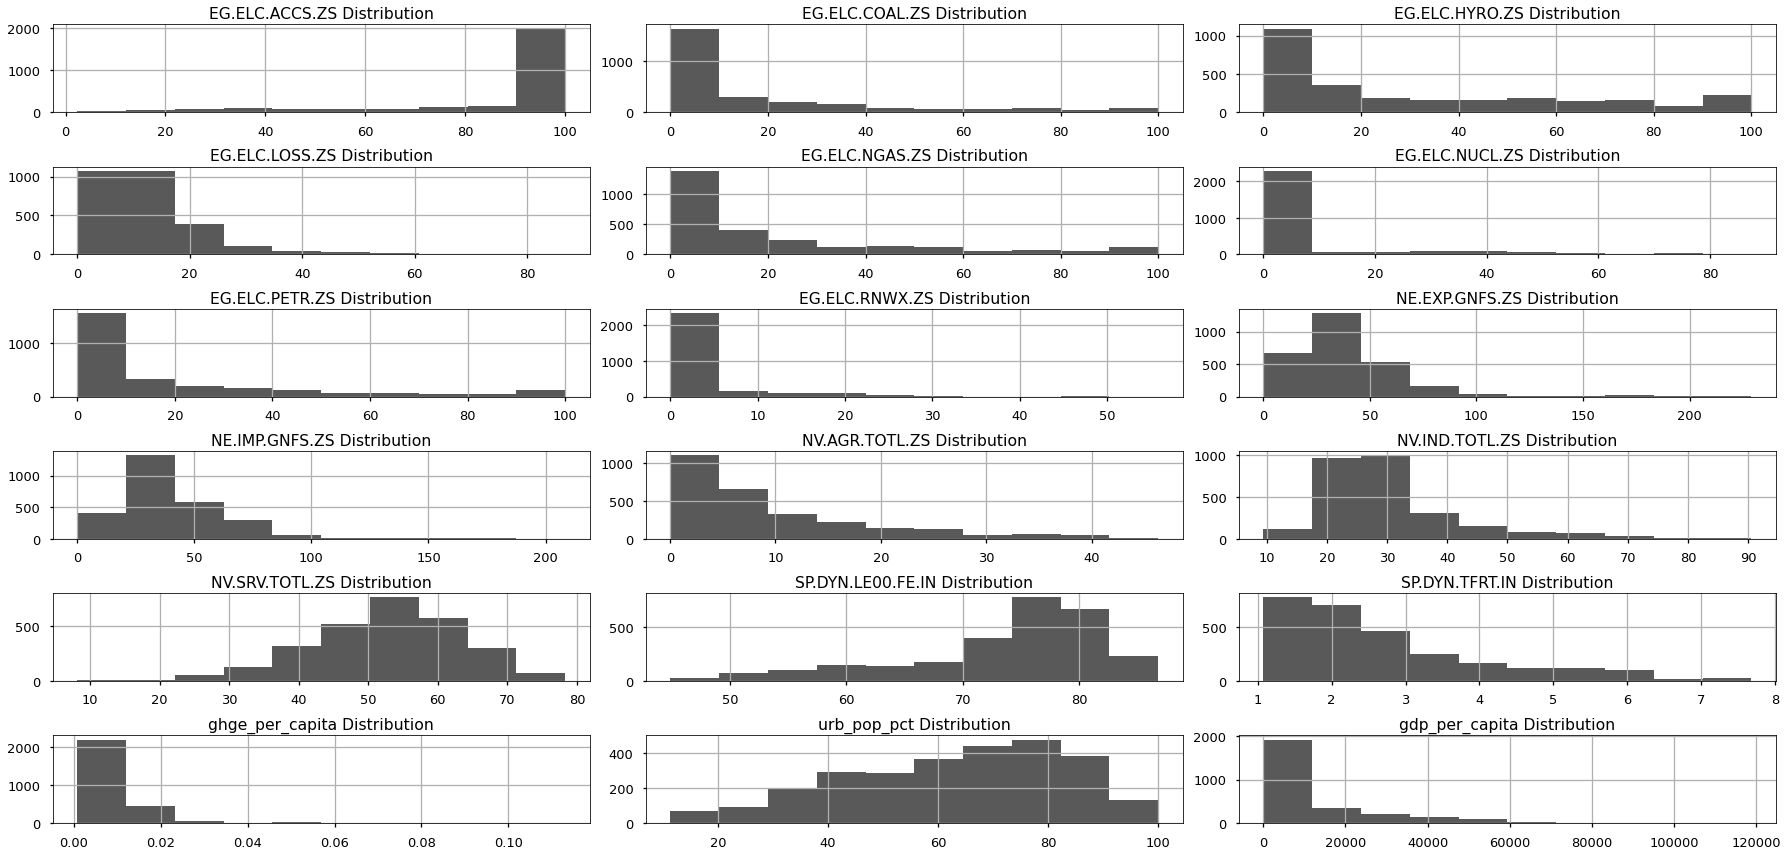

In [34]:
# Set the style
plt.style.use('seaborn-talk')
# Draw histograms for all columns
fig = plt.figure(figsize = (25, 12))
for i, var_name in enumerate(analysis_data_use.columns[2:]):
    ax = fig.add_subplot(6, 3, i + 1)
    analysis_data_use[var_name].hist(ax = ax, color = '#595959')
    ax.set_title(var_name + ' Distribution')
fig.tight_layout()

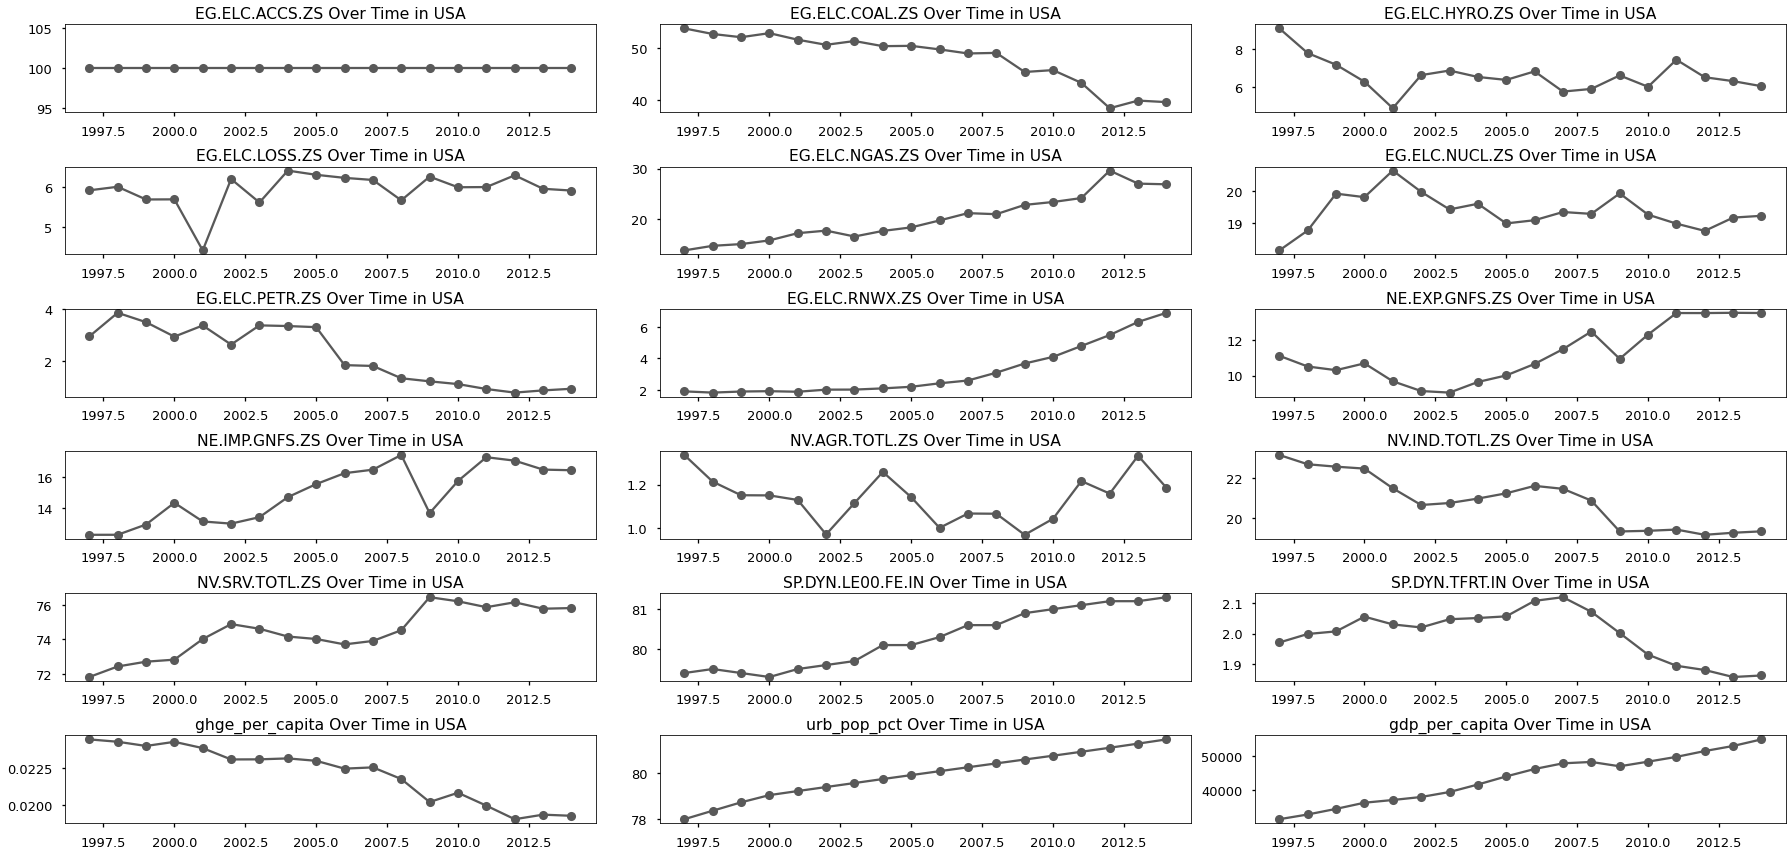

In [35]:
# Review time series data for specific countries / economies
plot_data = analysis_data_use[analysis_data_use['economy'] == 'USA']
fig = plt.figure(figsize = (25, 12))
for i, var_name in enumerate(plot_data.columns[2:]):
    ax = fig.add_subplot(6, 3, i + 1)
    ax.plot(plot_data['year'], plot_data[var_name], '-o', color = '#595959')
    ax.set_title(var_name + ' Over Time in USA')
fig.tight_layout()

Text(0.5, 1.0, 'World Bank Dataset Correlation Matrix')

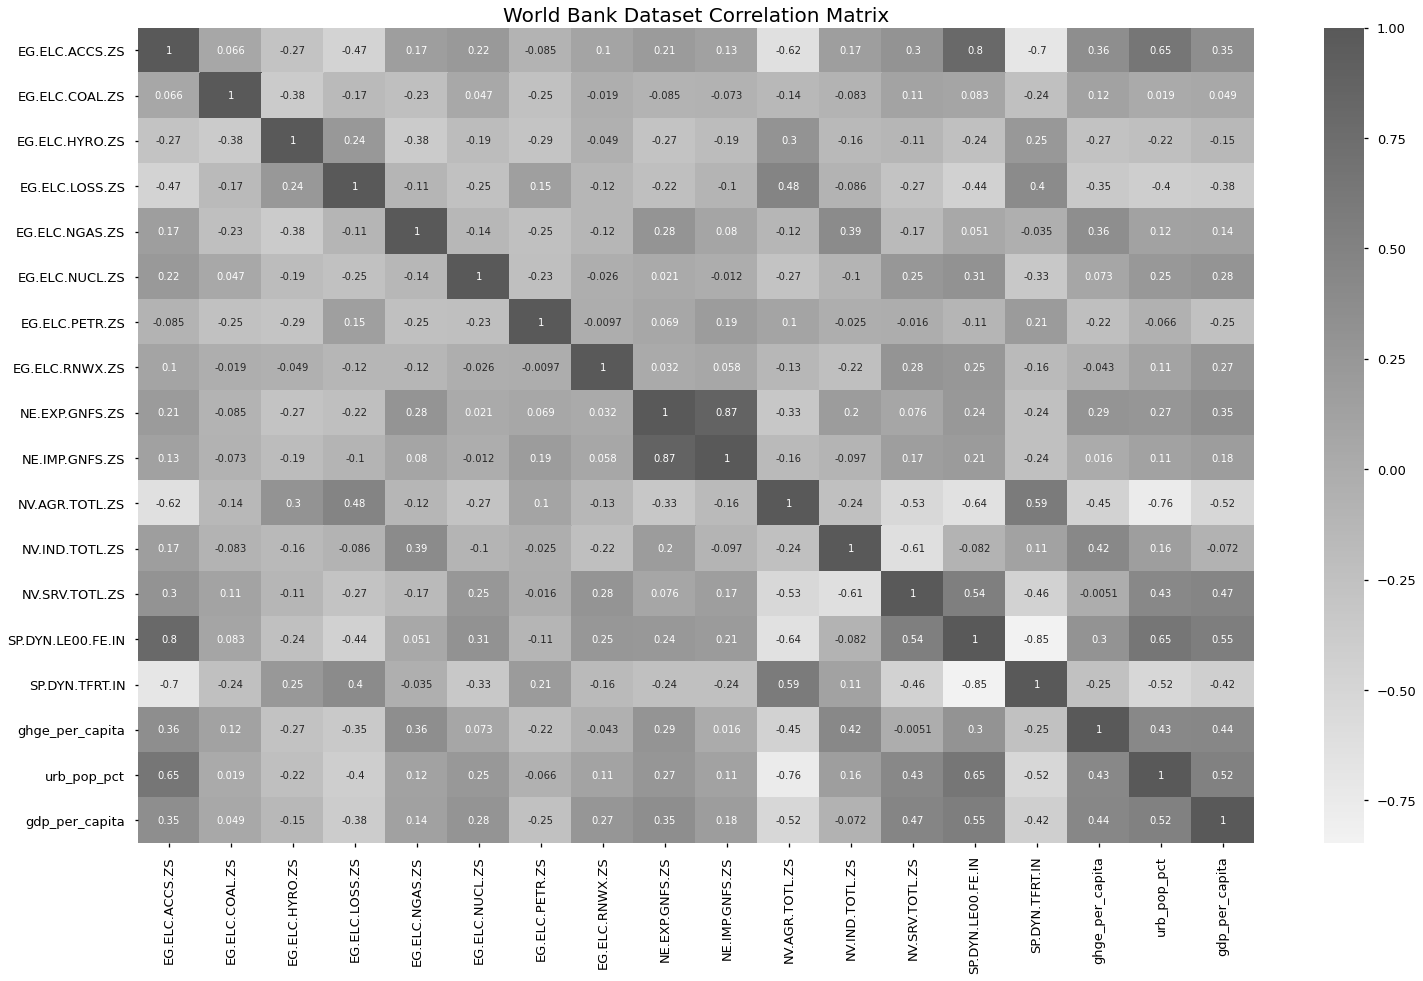

In [36]:
# Generate a colormap object
x = np.arange(25).reshape(5, 5)
cmap = sns.light_palette('#595959', as_cmap = True)
# Show full correlation matrix
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.heatmap(analysis_data_use.iloc[:,2:].corr(), ax = ax, annot = True, cmap = cmap).set_title('World Bank Dataset Correlation Matrix', fontsize = 20)

In [37]:
analysis_data_use.groupby(by = 'year').count().iloc[:,1:2]

,EG.ELC.ACCS.ZS
year,
1970,5
1971,14
1972,13
1973,13
1974,15
1975,16
1976,17
1977,17
1978,17
